In [ ]:
# Jumana Amr
# 2004235

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt


In [ ]:
dataPoints =np.array([[3,5],[4,6],[2,8],[2,3],[1,4]])
dataPoints

array([[3, 5],
       [4, 6],
       [2, 8],
       [2, 3],
       [1, 4]])

In [ ]:
clusters=np.array([[2,4],[1,7]])

In [ ]:
def CalculateDistance(dataPoints,clusters):
    # a 2d array with size len of datapoints * len of clusters
    # np.linalg.norm calculates the euclidean distance between two points 

    return np.array([[ np.linalg.norm(i-j) for j in clusters] for i in dataPoints])



In [ ]:
d=CalculateDistance(dataPoints,clusters)
d

array([[1.41421356, 2.82842712],
       [2.82842712, 3.16227766],
       [4.        , 1.41421356],
       [1.        , 4.12310563],
       [1.        , 3.        ]])

In [ ]:
def CalculateMembership(d,q):
  # a 2D array with the same size of the calculated distances array
  #this is an implementation of the Rnk where
  # let distance between current datapoint and cluster = d
  # 1/((sqrt(d11/dd11)+sqrt(d11/d12)) and so one based on the number of clusters) power 1/1-q
   return np.array([[  1/pow((pow(d[i][j],2)/pow(d[i][0],2)+pow(d[i][j],2)/pow(d[i][1],2)),1/(q-1)) for j in range(0,len(d[0])) ]for i in range(0,len(d))])
  
   

In [ ]:
q=2
Rnk=CalculateMembership(d,q)
Rnk

array([[0.8       , 0.2       ],
       [0.55555556, 0.44444444],
       [0.11111111, 0.88888889],
       [0.94444444, 0.05555556],
       [0.9       , 0.1       ]])

In [ ]:
def UpdateClusterMean(Rnk,dataPoints,q):
  Ranks= np.sum(pow(Rnk,q), axis = 0)
  # array that has summation of ranks power q * data point of all points and clusters
  # this is the numerator of the equation of mu
  num=np.array([[ ((Rnk[i][j]**q)*dataPoints[i]) for j in range(len(dataPoints[0]))] for i in range(len(dataPoints))])
  # this is the denumerator of the equation where it is the summation of the probabilities of 
  # of belonging to a datapoint power q 
  denum= np.sum(num, axis = 0)
  # the division of them is to get the new centers of the clusters
  mu=np.array([ denum[i]/Ranks[i] for i in range(len(Ranks))])

  return mu

In [ ]:
mu=UpdateClusterMean(Rnk,dataPoints,q)
mu

array([[2.16796477, 4.15572554],
       [2.4084223 , 7.45183867]])

In [ ]:
def CalculateObjectiveFunc(dataPoints,Rnk,mu,q,lmbda):
   s1=0
   s2=0
   # Ill seperate the objective function into two parts and add them when the loop is done
   #  to calculate s1 we will get the distance between the clusters and dataPoints
   # then we will multiply the rank by the calculated distance between the current 
   # data point and the current cluster
   # to calculate s2 we will calculate the rank of each point then subtract by 1
   # then we will multiply it by lambda

   d=CalculateDistance(dataPoints,clusters)
   for i in range(len(dataPoints)):
     for j in range(len(clusters)):
       s1=s1+(pow(Rnk[i][j],q)*pow(d[i][j],2))
       s2=s2+Rnk[i][j]

     s2=s2-1     

   return s1+s2


In [ ]:
lmbda=1
J=CalculateObjectiveFunc(dataPoints,Rnk,mu,q,lmbda)
J

9.666666666666668

In [ ]:
def ReachConvergence(dataPoints,rnk,mu,q,lmbda):
  oldJ=0
  newJ=0
  # we will start with the first J 
  # we will calculate the distance, membership and centers
  # if old J- new J less than 0.01
  # we will stop
  # if not then we will update the old J and create a new J to iterate on
  while(True):
    d=CalculateDistance(dataPoints,mu)
    rnk=CalculateMembership(d,q)
    mu=UpdateClusterMean(rnk,dataPoints,q)
    oldJ=CalculateObjectiveFunc(dataPoints,rnk,mu,q,lmbda)
    if abs(oldJ-newJ)<0.01 :
      break
    else: newJ=oldJ
  return mu,rnk



In [ ]:
conv=ReachConvergence(dataPoints,Rnk,mu,q,lmbda)
conv

(array([[1.65445038, 3.68532107],
        [3.02210542, 6.61444499]]), array([[0.42456695, 0.57543305],
        [0.10955025, 0.89044975],
        [0.13649584, 0.86350416],
        [0.95993201, 0.04006799],
        [0.95393597, 0.04606403]]), 14.69366498585638)

In [ ]:
J=[]

for i in range(2,10):

  rnk=CalculateMembership(d,i)
  J.append(CalculateObjectiveFunc(dataPoints,rnk,mu,i,lmbda))

In [ ]:
q=[]
for i in range(2,10):
 q.append(i)

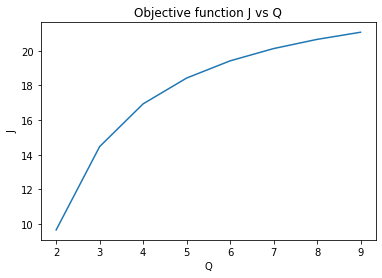

In [ ]:
plt.plot(q,J)
plt.title('Objective function J vs Q')
plt.xlabel('Q')
plt.ylabel('J')
plt.show()
